In [1]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment I_class_III.xlsx');
df2 = pd.read_excel('Formative Assessment-2_class_III.xlsx');
df3 = pd.read_excel('Half Yearly Exam_class_III.xlsx');

# In df3, where the Full Mark is not 100, multuply the Full Mark, Pass Mark and Marks Secured by 100/Full Mark
df3.loc[df3['Full Mark']!=100, 'Pass Mark'] = df3['Pass Mark']*100/df3['Full Mark'];
df3.loc[df3['Full Mark']!=100, 'Marks Secured'] = df3['Marks Secured']*100/df3['Full Mark'];
df3.loc[df3['Full Mark']!=100, 'Full Mark'] = df3['Full Mark']*100/df3['Full Mark'];

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2022-2023,Formative Assessment I,Offline,Science,Evaluating,25.0,7.0,0 %,Satyam Kr Chauhan,III,A,1,3.0,Fail
1,2022-2023,Formative Assessment I,Offline,Assamese,Evaluating,25.0,7.0,0 %,Satyam Kr Chauhan,III,A,1,15.5,Pass
2,2022-2023,Formative Assessment I,Offline,Drawing,Evaluating,25.0,7.0,0 %,Satyam Kr Chauhan,III,A,1,18.0,Pass
3,2022-2023,Formative Assessment I,Offline,English I,Evaluating,25.0,7.0,0 %,Satyam Kr Chauhan,III,A,1,3.5,Fail
4,2022-2023,Formative Assessment I,Offline,Maths,Evaluating,25.0,7.0,0 %,Satyam Kr Chauhan,III,A,1,16.5,Pass


In [3]:
# Print the number of cells with value 0 in marks secured column
print('Number of cells with value 0 in marks secured column: ', df[df['Marks Secured']==0].shape[0])

# Print the student names with value 0 in marks secured column
print('Student names with value 0 in marks secured column: ', df[df['Marks Secured']==0]['Student Name'].unique())

Number of cells with value 0 in marks secured column:  41
Student names with value 0 in marks secured column:  ['Mandeep Barman' 'Ayush Boro' 'Ayush Sharki' 'Piyushi Baruah'
 'Akansha Kumari' 'Sukanya Rohang' 'Nabadeep Chaudhary' 'Rajdeep Das'
 'Ayush Rajak' 'Anjali Kumari']


In [4]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [5]:
# print the number of subjects
print('Number of Subjects: ', len(subjects));
# Print the subjects
print('Subjects: ', subjects);
# print the number of students
print('Number of Students: ', len(students));

# print the number of exams
print('Number of Exams: ', len(exams));

Number of Subjects:  10
Subjects:  ['Science' 'Assamese' 'Drawing' 'English I' 'Maths' 'Hindi' 'Computer'
 'Social Science' 'General Knowledge' 'English II']
Number of Students:  28
Number of Exams:  3


In [6]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Satyam Kr Chauhan,III,A,1.0
1,Mandeep Barman,III,A,2.0
2,Rupesh Barwa,III,A,3.0
3,Anjali Kumari,III,A,4.0
4,Khushi Haloi,III,A,5.0


In [7]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;
        df_new[exam + '_' + subject + '_total'] = 0;
        df_new[exam + '_' + subject + '_pass'] = 0;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Science,Formative Assessment I_Science_total,Formative Assessment I_Science_pass,Formative Assessment I_Assamese,Formative Assessment I_Assamese_total,Formative Assessment I_Assamese_pass,...,Half Yearly Exam_Computer_pass,Half Yearly Exam_Social Science,Half Yearly Exam_Social Science_total,Half Yearly Exam_Social Science_pass,Half Yearly Exam_General Knowledge,Half Yearly Exam_General Knowledge_total,Half Yearly Exam_General Knowledge_pass,Half Yearly Exam_English II,Half Yearly Exam_English II_total,Half Yearly Exam_English II_pass
0,Satyam Kr Chauhan,III,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mandeep Barman,III,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rupesh Barwa,III,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anjali Kumari,III,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Khushi Haloi,III,A,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # full marks
            full_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Full Mark'].iloc[0];
            # pass marks
            pass_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Pass Mark'].iloc[0];
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Science,Formative Assessment I_Science_total,Formative Assessment I_Science_pass,Formative Assessment I_Assamese,Formative Assessment I_Assamese_total,Formative Assessment I_Assamese_pass,...,Half Yearly Exam_Computer_pass,Half Yearly Exam_Social Science,Half Yearly Exam_Social Science_total,Half Yearly Exam_Social Science_pass,Half Yearly Exam_General Knowledge,Half Yearly Exam_General Knowledge_total,Half Yearly Exam_General Knowledge_pass,Half Yearly Exam_English II,Half Yearly Exam_English II_total,Half Yearly Exam_English II_pass
0,Satyam Kr Chauhan,III,A,1.0,3.0,25,7,15.5,25,7,...,30,44,100,30,18,100,30,8,100,30
1,Mandeep Barman,III,A,2.0,6.5,25,7,7.0,25,7,...,30,37,100,30,21,100,30,21,100,30
2,Rupesh Barwa,III,A,3.0,22.0,25,7,14.5,25,7,...,30,83,100,30,98,100,30,84,100,30
3,Anjali Kumari,III,A,4.0,15.0,25,7,13.5,25,7,...,30,17,100,30,0,100,30,0,100,30
4,Khushi Haloi,III,A,5.0,15.0,25,7,17.5,25,7,...,30,63,100,30,61,100,30,42,100,30


In [9]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

/tmp/ipykernel_89081/1942589083.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Weightage ' + subject] = np.nan;


,Student Name,Class,Section,Roll No,Formative Assessment I_Science,Formative Assessment I_Science_total,Formative Assessment I_Science_pass,Formative Assessment I_Assamese,Formative Assessment I_Assamese_total,Formative Assessment I_Assamese_pass,...,Weightage Science,Weightage Assamese,Weightage Drawing,Weightage English I,Weightage Maths,Weightage Hindi,Weightage Computer,Weightage Social Science,Weightage General Knowledge,Weightage English II
0,Satyam Kr Chauhan,III,A,1.0,3.0,25,7,15.5,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mandeep Barman,III,A,2.0,6.5,25,7,7.0,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rupesh Barwa,III,A,3.0,22.0,25,7,14.5,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anjali Kumari,III,A,4.0,15.0,25,7,13.5,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Khushi Haloi,III,A,5.0,15.0,25,7,17.5,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Calculate the weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
for subject in subjects:
    df_new['Weightage ' + subject] = round(df_new['Formative Assessment I_' + subject] * 0.4 + df_new['Formative Assessment-2_' + subject] * 0.4 + df_new['Half Yearly Exam_' + subject] * 0.8, 2);
    # Calculate the full weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
    df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment I_' + subject + '_total'] * 0.4 + df_new['Formative Assessment-2_' + subject + '_total'] * 0.4 + df_new['Half Yearly Exam_' + subject + '_total'] * 0.8;

/tmp/ipykernel_89081/2845463436.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment I_' + subject + '_total'] * 0.4 + df_new['Formative Assessment-2_' + subject + '_total'] * 0.4 + df_new['Half Yearly Exam_' + subject + '_total'] * 0.8;


In [11]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30% of the full weightage
for subject in subjects:
    # calculate the weightage result
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');

/tmp/ipykernel_89081/717132809.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');


In [12]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

/tmp/ipykernel_89081/106921885.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Total Weightage'] = 0;


,Student Name,Class,Section,Roll No,Formative Assessment I_Science,Formative Assessment I_Science_total,Formative Assessment I_Science_pass,Formative Assessment I_Assamese,Formative Assessment I_Assamese_total,Formative Assessment I_Assamese_pass,...,Result Assamese,Result Drawing,Result English I,Result Maths,Result Hindi,Result Computer,Result Social Science,Result General Knowledge,Result English II,Total Weightage
0,Satyam Kr Chauhan,III,A,1.0,3.0,25,7,15.5,25,7,...,Pass,Pass,Pass,Pass,Pass,Fail,Pass,Fail,Fail,370.2
1,Mandeep Barman,III,A,2.0,6.5,25,7,7.0,25,7,...,Fail,Pass,Pass,Pass,Fail,Pass,Pass,Fail,Fail,357.4
2,Rupesh Barwa,III,A,3.0,22.0,25,7,14.5,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,744.6
3,Anjali Kumari,III,A,4.0,15.0,25,7,13.5,25,7,...,Fail,Fail,Pass,Fail,Fail,Fail,Pass,Fail,Fail,275.8
4,Khushi Haloi,III,A,5.0,15.0,25,7,17.5,25,7,...,Pass,Pass,Pass,Pass,Pass,Fail,Pass,Pass,Pass,606.0


In [13]:
# Add a result column
df_new['Result'] = '';

# Function to add all weightage subject total
def add_total_weightage(row):
    total = 0;
    for subject in subjects:
        total += row['Weightage ' + subject + ' total'];
    return total;


# Add the total marks column
df_new['Total Marks'] = df_new.apply(add_total_weightage, axis=1);

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] >= df_new['Total Marks'] * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] < df_new['Total Marks'] * 0.3, 'Result'] = 'Fail';

/tmp/ipykernel_89081/19931101.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result'] = '';


In [14]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False);

In [15]:
# Print the first row
df_new.iloc[0]

Student Name                      Satyam Kr Chauhan
Class                                           III
Section                                           A
Roll No                                         1.0
Formative Assessment I_Science                  3.0
                                        ...        
Total Weightage                               370.2
Result                                         Pass
Total Marks                                  1000.0
Percentage                                    37.02
Rank                                           17.0
Name: 0, Length: 129, dtype: object

In [16]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment I_Science,Formative Assessment I_Science_total,Formative Assessment I_Science_pass,Formative Assessment I_Assamese,Formative Assessment I_Assamese_total,Formative Assessment I_Assamese_pass,...,Result Hindi,Result Computer,Result Social Science,Result General Knowledge,Result English II,Total Weightage,Result,Total Marks,Percentage,Rank
0,Satyam Kr Chauhan,III,A,1.0,3.0,25,7,15.5,25,7,...,Pass,Fail,Pass,Fail,Fail,370.2,Pass,1000.0,37.02,17.0
1,Mandeep Barman,III,A,2.0,6.5,25,7,7.0,25,7,...,Fail,Pass,Pass,Fail,Fail,357.4,Pass,1000.0,35.74,18.0
2,Rupesh Barwa,III,A,3.0,22.0,25,7,14.5,25,7,...,Pass,Pass,Pass,Pass,Pass,744.6,Pass,1000.0,74.46,3.0
3,Anjali Kumari,III,A,4.0,15.0,25,7,13.5,25,7,...,Fail,Fail,Pass,Fail,Fail,275.8,Fail,1000.0,27.58,22.0
4,Khushi Haloi,III,A,5.0,15.0,25,7,17.5,25,7,...,Pass,Fail,Pass,Pass,Pass,606.0,Pass,1000.0,60.60,8.0
5,Ayush Boro,III,A,6.0,10.0,25,7,11.0,25,7,...,Fail,Fail,Fail,Fail,Fail,121.2,Fail,1000.0,12.12,28.0
6,Jagrity Mahato,III,A,7.0,17.5,25,7,19.0,25,7,...,Pass,Pass,Pass,Pass,Pass,853.6,Pass,1000.0,85.36,1.0
7,Abhik Joshi,III,A,8.0,14.5,25,7,7.0,25,7,...,Pass,Pass,Pass,Pass,Pass,548.4,Pass,1000.0,54.84,10.0
8,Ayush Sharki,III,A,9.0,1.0,25,7,2.0,25,7,...,Fail,Fail,Fail,Fail,Fail,128.2,Fail,1000.0,12.82,27.0
9,Piyushi Baruah,III,A,10.0,4.5,25,7,11.5,25,7,...,Fail,Fail,Fail,Fail,Fail,215.0,Fail,1000.0,21.50,23.0


In [17]:
# Export the dataframe to excel
df_new.to_excel('Result.xlsx', index=False);

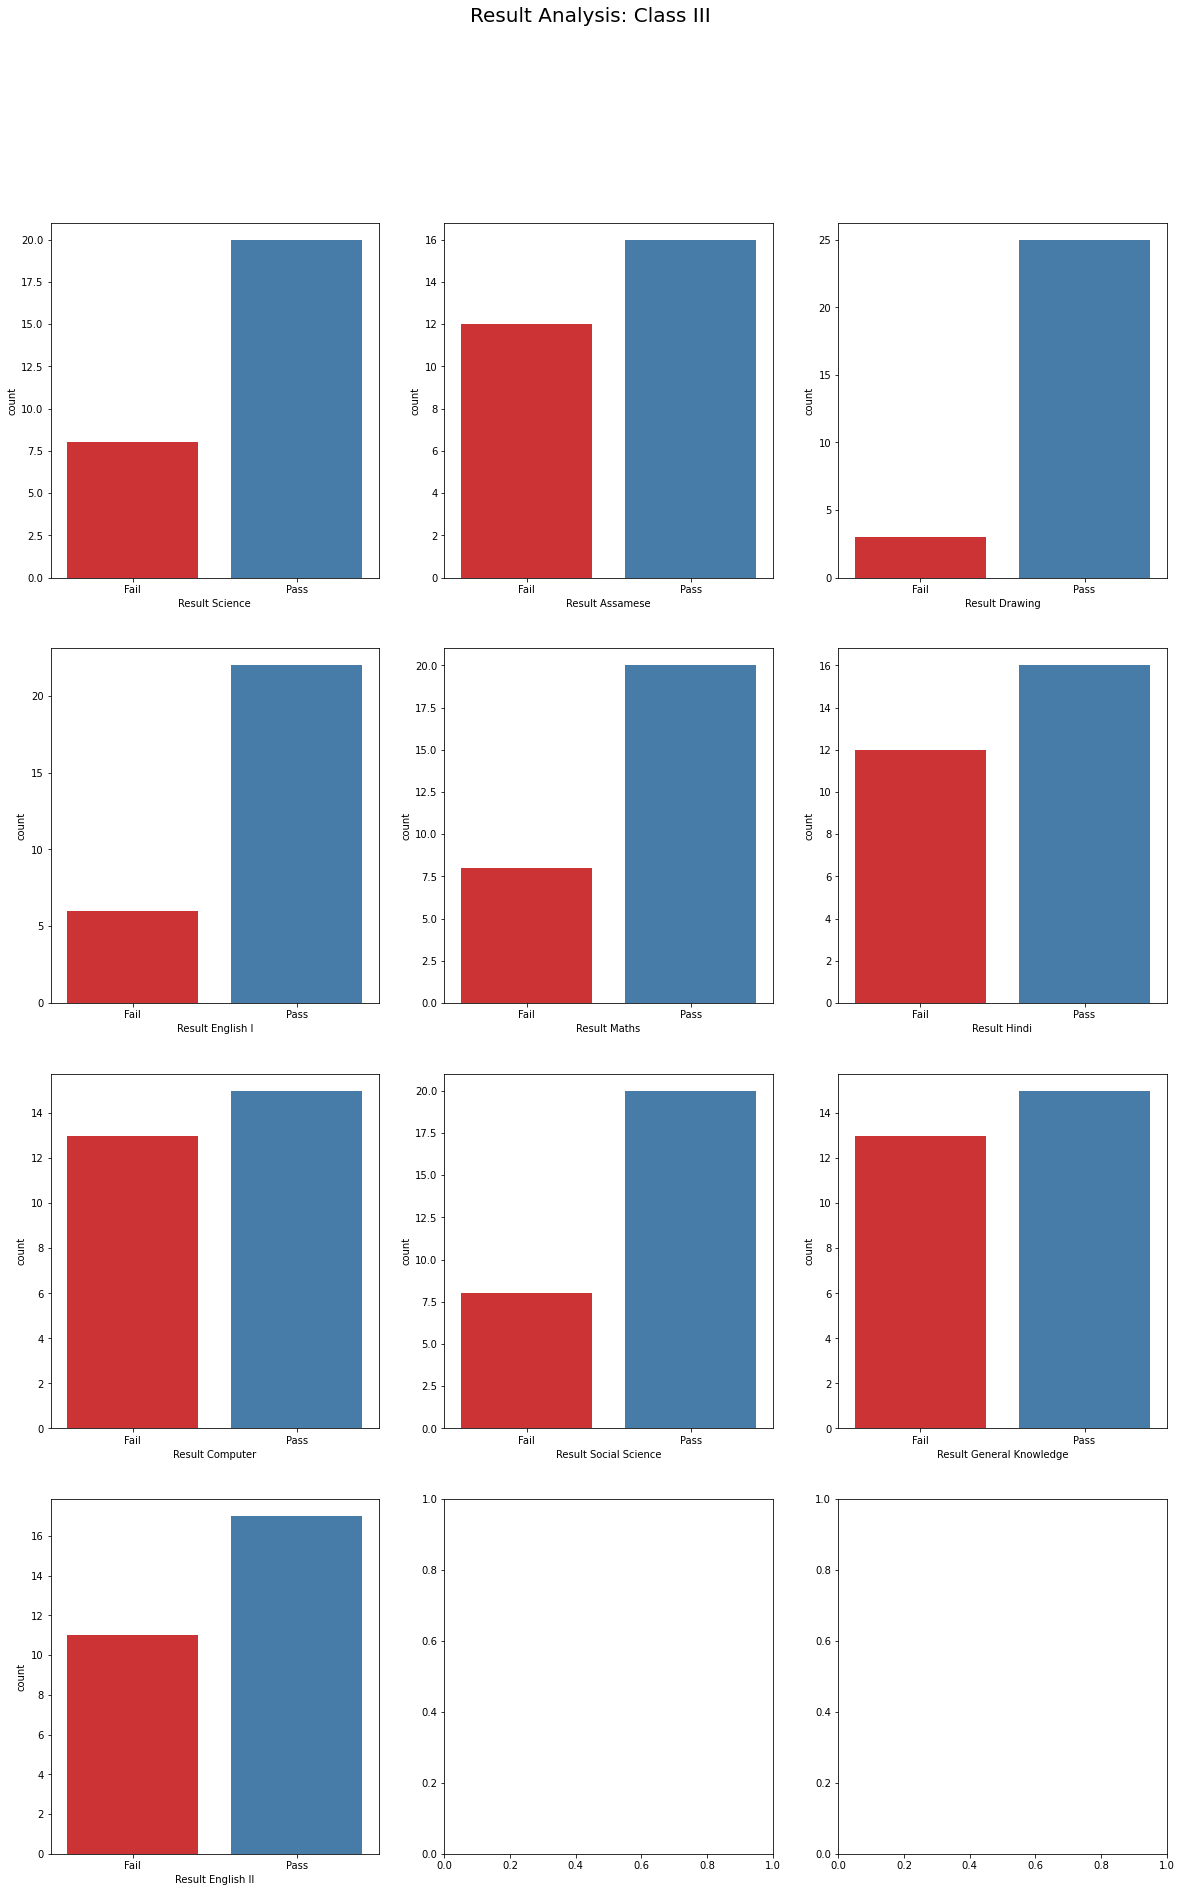

In [18]:
# Combine the charts in one figure
fig, axes = plt.subplots(4, 3, figsize=(20, 30));

# Set the title of the figure
fig.suptitle('Result Analysis: Class III', fontsize=20);

for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
plt.show();